## 1. Wczytanie i skalowanie wartości pikseli obrazu

torch.Size([3, 1080, 1080])


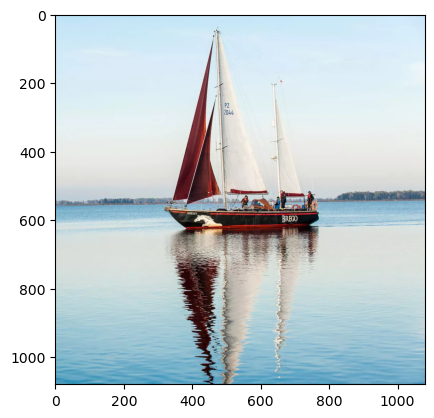

In [60]:
import torch
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('brego-full-crop.jpg')

# konwersja obrazu na tensor i normalizacja wartości do [0,1]
transform = transforms.Compose([
    transforms.ToTensor()
])
brego_image_rgb = transform(img)

plt.imshow(brego_image_rgb.permute(1, 2, 0).numpy())
plt.show()

## 2. Konwersja obrazu na skalę szarości

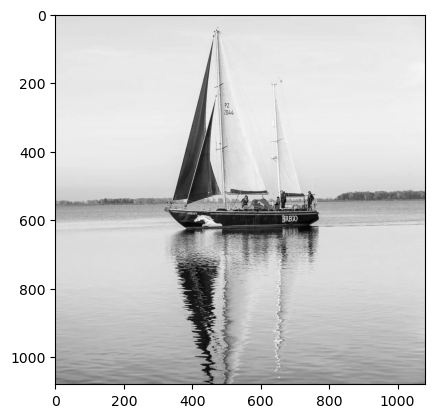

In [63]:
# wymiary kernela: (out_channels, in_channels, height, width)
greyscale_kernel = torch.tensor([[[[0.4]], [[0.3]], [[0.3]]]])  # Shape: (1, 3, 1, 1)

# robimy konwolucje na obrazie uzywajac powyzszego kernela
# Note: 'conv2d' expects a 4D tensor (batch_size, channels, height, width)
brego_image_gs = F.conv2d(brego_image_rgb, greyscale_kernel)

# usuwamy wymiar na batch size i juz niepotrzebny na 3 wartosci kolorow, zostaje 2d z wartoscia kazdego piksela
brego_image_gs = brego_image_gs.squeeze(0).squeeze(0)

plt.imshow(brego_image_gs.detach().numpy(), cmap='gray', vmin=0, vmax=1)
plt.show()

## 3. Pooling - redukcja rozmiaru

[[0.85294118 0.85294118 0.85294118 ... 0.87960784 0.87960784 0.87960784]
 [0.85294118 0.85294118 0.85294118 ... 0.87960784 0.87960784 0.87960784]
 [0.85294118 0.85294118 0.85294118 ... 0.87960784 0.87960784 0.87960784]
 ...
 [0.54156863 0.54156863 0.53764706 ... 0.49176471 0.49176471 0.48862745]
 [0.54156863 0.54156863 0.53764706 ... 0.48313725 0.4827451  0.4827451 ]
 [0.54156863 0.54156863 0.53764706 ... 0.48666667 0.48666667 0.48666667]]
